# Going Deeper

*... is not always a good idea...*

Deep Learning is all about **depth** so let's go deeper (what could go wrong anyway?)!!!

Start with the usual stuff:

In [2]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
%matplotlib inline


# Prepare the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((-1, 28*28)) / 255.0
x_test = x_test.reshape((-1, 28*28)) / 255.0
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)



Let's see what would happen a few years ago:

In [3]:
model = Sequential()

model.add(Dense(256, activation='sigmoid', input_dim=784, kernel_initializer='random_uniform'))
model.add(Dense(256, activation='sigmoid', kernel_initializer='random_uniform'))
model.add(Dense(512, activation='sigmoid', kernel_initializer='random_uniform'))
model.add(Dense(512, activation='sigmoid', kernel_initializer='random_uniform'))
model.add(Dense(1024, activation='sigmoid', kernel_initializer='random_uniform'))
model.add(Dense(1024, activation='sigmoid', kernel_initializer='random_uniform'))

model.add(Dense(10, activation='softmax'))
from keras.optimizers import SGD
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.001, momentum=0.9), metrics=['accuracy'])

results = model.fit(x_train, y_train, epochs=50, batch_size=256, verbose=0, validation_data=(x_test, y_test))
print("Train accuracy: ", model.evaluate(x_train, y_train, batch_size=128))
print("Test accuracy: ", model.evaluate(x_test, y_test, batch_size=128))

60000/60000 [==============================] - 1s 12us/step
Train accuracy:  [2.303395494333903, 0.11236666666666667]
10000/10000 [==============================] - 0s 13us/step
Test accuracy:  [2.3028136863708495, 0.1135]


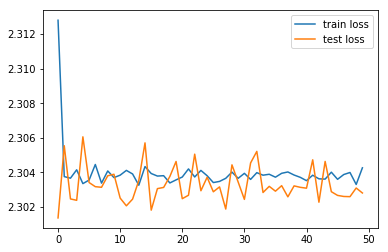

In [4]:
plt.figure(1)
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['train loss', 'test loss'])

Are we doing something wrong? Let's try a simpler model!

In [5]:
model = Sequential()

model.add(Dense(256, activation='sigmoid', input_dim=784, kernel_initializer='random_uniform'))
model.add(Dense(10, activation='softmax'))
from keras.optimizers import SGD
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.001, momentum=0.9), metrics=['accuracy'])

results = model.fit(x_train, y_train, epochs=50, batch_size=256, verbose=2, validation_data=(x_test, y_test))
print("Train accuracy: ", model.evaluate(x_train, y_train, batch_size=128))
print("Test accuracy: ", model.evaluate(x_test, y_test, batch_size=128))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
 - 1s - loss: 2.1682 - acc: 0.4276 - val_loss: 1.9925 - val_acc: 0.6250
Epoch 2/50
 - 1s - loss: 1.8564 - acc: 0.6906 - val_loss: 1.7047 - val_acc: 0.7392
Epoch 3/50
 - 1s - loss: 1.5905 - acc: 0.7453 - val_loss: 1.4531 - val_acc: 0.7797
Epoch 4/50
 - 1s - loss: 1.3648 - acc: 0.7763 - val_loss: 1.2475 - val_acc: 0.7989
Epoch 5/50
 - 1s - loss: 1.1838 - acc: 0.7968 - val_loss: 1.0867 - val_acc: 0.8168
Epoch 6/50
 - 1s - loss: 1.0435 - acc: 0.8110 - val_loss: 0.9637 - val_acc: 0.8247
Epoch 7/50
 - 1s - loss: 0.9355 - acc: 0.8228 - val_loss: 0.8688 - val_acc: 0.8352
Epoch 8/50
 - 1s - loss: 0.8517 - acc: 0.8314 - val_loss: 0.7944 - val_acc: 0.8442
Epoch 9/50
 - 1s - loss: 0.7856 - acc: 0.8394 - val_loss: 0.7354 - val_acc: 0.8503
Epoch 10/50
 - 1s - loss: 0.7326 - acc: 0.8452 - val_loss: 0.6879 - val_acc: 0.8545
Epoch 11/50
 - 1s - loss: 0.6894 - acc: 0.8502 - val_loss: 0.6485 - val_acc: 0.8625
Epoch 12/50
 - 1s - loss: 0.6534 - 

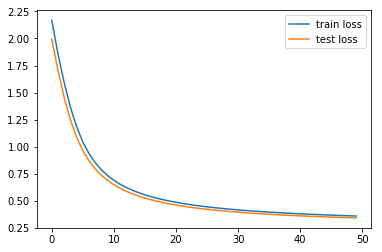

In [6]:
plt.figure(1)
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['train loss', 'test loss'])

### So what makes deep learning work?

Careful initialization + appropriate activation functions + weight sharing / smart architectures + regularization

Tips:
1. Ensure that a good initialization scheme is used (e.g., Xavier, He, etc. )
2. Use an activation function that does not lead to vanishing gradients (e.g., relu, prelu, elu, ...)
3. Use a regularized network structure (e.g., CNNs, residual connection, ...)
4. Use regularization (e.g., dropout) and/or batch normalization
5. Use an advanced optimizer (e.g., Adam, RMSProp, ...) (use them with a grain of salt)

Let's use some of these techniques!

In [9]:
model = Sequential()

model.add(Dense(256, activation='relu', input_dim=784, kernel_initializer=keras.initializers.he_uniform()))
model.add(Dense(256, activation='relu', kernel_initializer=keras.initializers.he_uniform()))
model.add(Dense(512, activation='relu', kernel_initializer=keras.initializers.he_uniform()))
model.add(Dense(512, activation='relu', kernel_initializer=keras.initializers.he_uniform()))
model.add(Dense(1024, activation='relu', kernel_initializer=keras.initializers.he_uniform()))
model.add(Dense(1024, activation='relu', kernel_initializer=keras.initializers.he_uniform()))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

That is a deep one indeed! Let's examine its architecture!

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_12 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_13 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_14 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_15 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dense_16 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_17 (Dense)             (None, 10)                10250     
Total para

Train the model:

In [11]:
results = model.fit(x_train, y_train, epochs=50, batch_size=256, verbose=2, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
 - 2s - loss: 0.4743 - acc: 0.8625 - val_loss: 0.2035 - val_acc: 0.9372
Epoch 2/50
 - 2s - loss: 0.1604 - acc: 0.9515 - val_loss: 0.1391 - val_acc: 0.9579
Epoch 3/50
 - 2s - loss: 0.1083 - acc: 0.9674 - val_loss: 0.1179 - val_acc: 0.9630
Epoch 4/50
 - 2s - loss: 0.0778 - acc: 0.9768 - val_loss: 0.1084 - val_acc: 0.9658
Epoch 5/50
 - 2s - loss: 0.0597 - acc: 0.9822 - val_loss: 0.0977 - val_acc: 0.9696
Epoch 6/50
 - 2s - loss: 0.0435 - acc: 0.9872 - val_loss: 0.1005 - val_acc: 0.9692
Epoch 7/50
 - 2s - loss: 0.0329 - acc: 0.9903 - val_loss: 0.0890 - val_acc: 0.9735
Epoch 8/50
 - 2s - loss: 0.0251 - acc: 0.9933 - val_loss: 0.0924 - val_acc: 0.9733
Epoch 9/50
 - 2s - loss: 0.0171 - acc: 0.9951 - val_loss: 0.1106 - val_acc: 0.9695
Epoch 10/50
 - 2s - loss: 0.0148 - acc: 0.9957 - val_loss: 0.1010 - val_acc: 0.9734
Epoch 11/50
 - 2s - loss: 0.0098 - acc: 0.9977 - val_loss: 0.1004 - val_acc: 0.9744
Epoch 12/50
 - 2s - loss: 0.0061 - 

The network perfectly learns the training set (100% accuracy), but it is still below state-of-the-art (~1.9% test error). Let's examine the training curves:

Log data:  dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


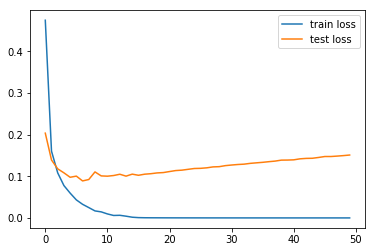

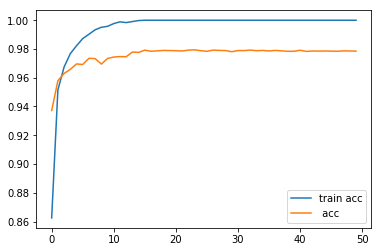

In [12]:
print("Log data: ", results.history.keys())

plt.figure(1)
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['train loss', 'test loss'])

plt.figure(2)
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.legend(['train acc', ' acc'])